<a href="https://colab.research.google.com/github/Fath-Elmisbah/Mungala/blob/master/Stock%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

We've pre-loaded some basic libraries, but you may import other libraries for your analysis.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Stock Analysis

In this technical assessment, you are given an empirical exercise to analyze Apple's stock (AAPL). Relevant data files can be found in the 'data' folder, please do not substitute or import other data.

**Follow the hints and instructions to complete the functions in class stock_analysis.**

In [743]:
class stock_analysis:
    
    def __init__(self, df):
        self.df = df

    def visualization(self, column_name, plot_name):
        """
        Create a visualization with x-axis as Date, y-axis as specified column, and a clear plot name.
        
        :param column_name: str
        :param plot_name: str
        """
        self.df[column_name].plot(grid=True, title=plot_name)

    def preprocess_data(self):
        """
        Clean data, data checks, missing data, outliers etc.
        
        :return: pre-processed data
        """
        preprocessed_data = self.df.copy()
        preprocessed_data = preprocessed_data.abs()
        close = preprocessed_data['Adj Close']
        close[np.abs(close-close.mean()) >= (1.5*close.std())] = np.nan # oiutliers set to nan
        preprocessed_data.fillna(method='ffill',inplace=True) # fill nan with the next row value
        preprocessed_data.fillna(method='bfill',inplace=True) # fill the remaining nan (The last one if applicable) using the previous value
        return preprocessed_data
    
    def calculate_return(self):
        """
        Calculate stock return. The calculated return should be saved as column 'Return' in the dataframe.
        """
        self.df['Return'] = self.df['Adj Close']/self.df['Adj Close'].shift(1)
        self.df['Return'][0] = self.df['Return'][1] # estimate first day return to the next one
        return self.df.head()
    
    def calculate_annualized_return(self):
        """
        Calculate annualized return.
        Formula: ((1+stock's total return over the period)**(1/years))-1
        
        :return: stock's annualized return
        """
        years = self.df.index[-1].year - self.df.index[0].year
        annualized_ret = ((1 + self.df['Return'].sum())**(1/years)) - 1

        return annualized_ret
    
    def calculate_annualized_volatility(self):
        """
        Calculate annualized volatility.
        Formula: (stock's historical standard deviation)*252**0.5
        
        :return: stock's annualized volatility
        """
        annualized_std = self.df['Return'].std()*252**.5
        return annualized_std

#### Import Data

In [744]:
aapl_df = pd.read_csv('data/AAPL.csv', parse_dates=['Date'])
aapl_df.set_index('Date', inplace=True)

In [745]:
aapl_df.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2016-09-01,26.535000,26.700001,26.405001,25.023932,106806000
2016-09-02,26.924999,27.000000,26.705000,25.258389,107210000
2016-09-06,26.975000,27.075001,26.877501,25.251356,107521600
2016-09-07,26.957500,27.190001,26.767500,25.406096,169457200
2016-09-08,26.812500,26.817499,26.309999,24.740231,212008000


#### AAPL - Stock Analysis

In [746]:
aapl = stock_analysis(aapl_df)

##### Task 1: Visualize AAPL's historical stock price. What are your observations? How would you handle the data?

Ans:

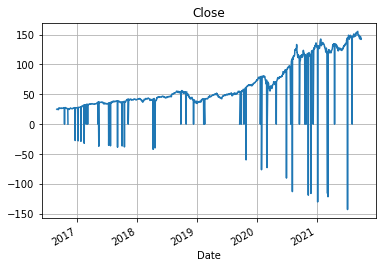

In [747]:
aapl.visualization('Adj Close','Close')

##### Task 2: Pre-process the data to resolve any data errors (Clean data, data checks, missing data, outliers etc)

In [748]:
aapl_processed_df = aapl.preprocess_data()

In [749]:
aapl_processed_df.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2016-09-01,26.535000,26.700001,26.405001,25.023932,106806000.0
2016-09-02,26.924999,27.000000,26.705000,25.258389,107210000.0
2016-09-06,26.975000,27.075001,26.877501,25.251356,107521600.0
2016-09-07,26.957500,27.190001,26.767500,25.406096,169457200.0
2016-09-08,26.812500,26.817499,26.309999,24.740231,212008000.0


In [750]:
aapl_processed_df.shape

(1278, 5)

In [751]:
aapl = stock_analysis(aapl_processed_df)

##### Task 3: Visualize the historical stock price again. Does it make more sense now?

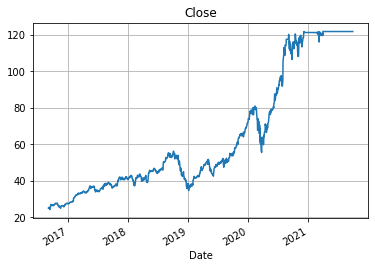

In [752]:
aapl.visualization('Adj Close','Close')

##### Task 4: Calculate AAPL's historical return and visualize it

In [753]:
aapl.calculate_return()

,Open,High,Low,Adj Close,Volume,Return
Date,,,,,,
2016-09-01,26.535000,26.700001,26.405001,25.023932,106806000.0,1.009369
2016-09-02,26.924999,27.000000,26.705000,25.258389,107210000.0,1.009369
2016-09-06,26.975000,27.075001,26.877501,25.251356,107521600.0,0.999722
2016-09-07,26.957500,27.190001,26.767500,25.406096,169457200.0,1.006128
2016-09-08,26.812500,26.817499,26.309999,24.740231,212008000.0,0.973791


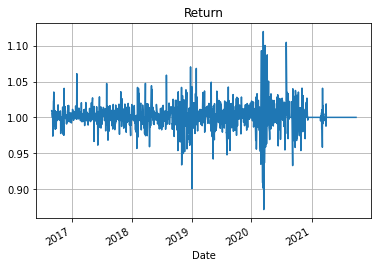

In [754]:
aapl.visualization('Return','Return')

##### Task 5: Calculate AAPL's historical annualized return and annualized volatility

In [755]:
aapl.calculate_annualized_return()

3.183070304325062

In [756]:
aapl.calculate_annualized_volatility()

0.2745860615156591

##### Task 6: Simple regression: AAPL = beta*SPY + epsilon

In [757]:
spy_df = pd.read_csv('data/SPY.csv', parse_dates=['Date'])
spy_df.set_index('Date', inplace=True)
spy_df.index.shape

(1278,)

In [758]:
spy_df.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2016-09-01,217.369995,217.729996,216.029999,0.000000,97844200
2016-09-02,218.389999,218.869995,217.699997,198.384659,79293900
2016-09-06,218.699997,219.119995,217.860001,198.984268,56702100
2016-09-07,218.839996,219.220001,218.300003,198.966125,76554900
2016-09-08,218.619995,218.940002,218.149994,198.511871,74102900


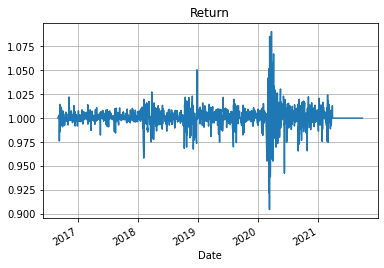

In [759]:
spy = stock_analysis(spy_df)
spy_processed_df = spy.preprocess_data()
spy = stock_analysis(spy_processed_df)
spy.calculate_return()
spy.visualization('Return','Return')

In [760]:
spy.df[spy.df.isna().any(axis=1)]

,Open,High,Low,Adj Close,Volume,Return
Date,,,,,,


In [761]:
aapl_ret = aapl.df['Return'].values[1:].reshape((-1,1))
spy_ret = spy.df['Return'].values[1:].reshape((-1,1))

In [762]:
reg = LinearRegression().fit(aapl_ret, spy_ret, )

In [763]:
reg.coef_

array([[0.39034471]])

In [764]:
reg.intercept_

array([0.60970698])

Ans: (.39, .61)

#### Additional Points:

##### What additional EDA (Visualization, Statistical Analysis...) can you perform on the dataset?

##### What are the assumptions for a linear model?

##### You have fit a single factor (SPY) model. What are the advantages/disadvantages of this stucture?